## **Session 1 - PPT**

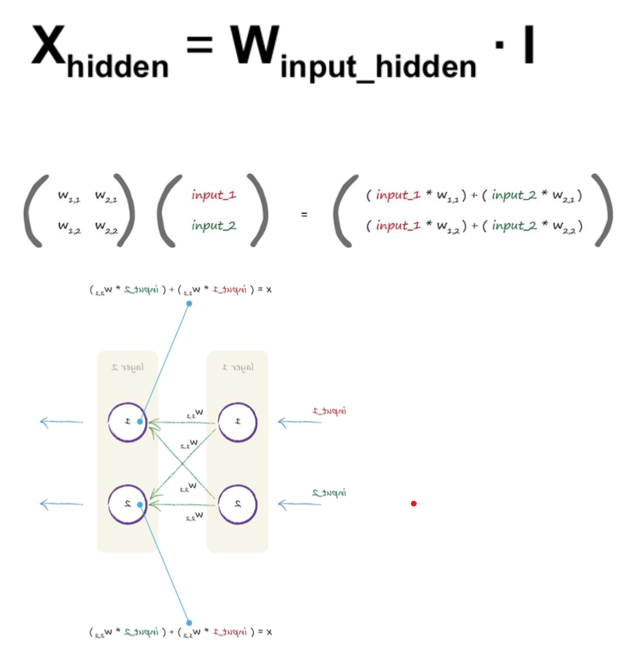

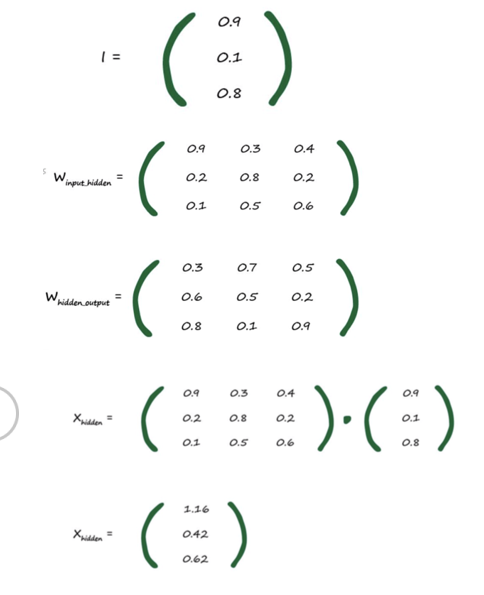

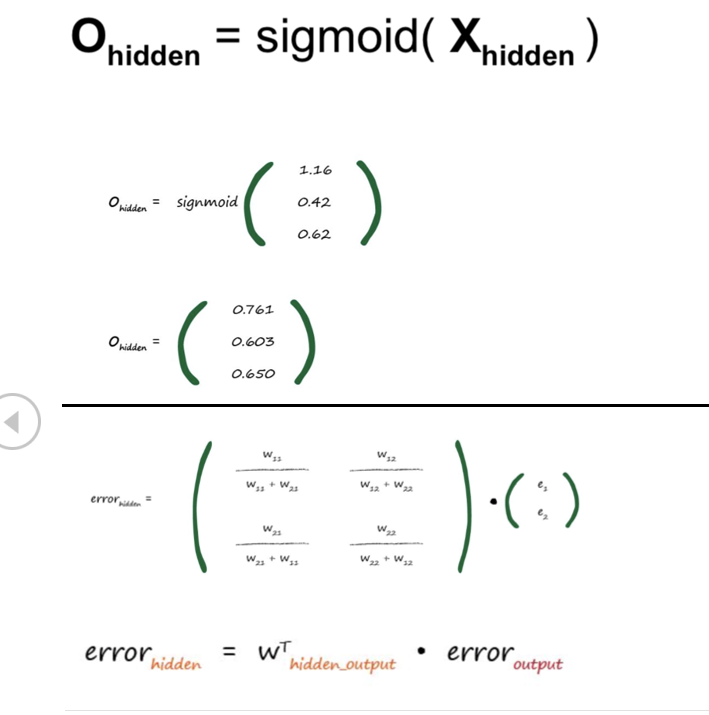

## Basic Operations

In [2]:
# Check Basic Operations
# data.info() 
# ----------------------
# Check Duplicate
# data.duplicated().sum()
# ----------------------
# Check null value
# data.isna().sum()
# ----------------------
# drop null value
# data = data.dropna()
# ----------------------
# fill null value with 0
# data = data.fillna(0)
# ----------------------
# Fill null value with mean,median, model column wise
# data['Income'].fillna(value=data['Income'].mean(), inplace=True)
# ----------------------
# drop according to index
# data = data.drop(index)
# ----------------------
# change datatype
# data['Income'] = data['Income'].astype(float)
# ----------------------
# Manual encoding 
# data["Living_With"] = data["Living_With"].replace({"Alone": 1, "Partner":2})
# ----------------------
# One hot encoding
# data_1 = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
# ----------------------
#### Import label encoder
# from sklearn import preprocessing
  
### label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
### Encode labels in column 'species'.
# df['species']= label_encoder.fit_transform(df['species'])


In [2]:
## NULL VALUE PLOT Just change data_1 at 3 place (Line 1, 2, 4)
## and change x,xi value by total number of rows. Current data set had 2240 rows

null_count = data_1.isna().sum()
null_count_percentage = null_count/data_1.count()[0] *100

null_count.plot(kind='barh', figsize=(30,25), color = "black", alpha = 0.8,edgecolor = "black")
for i in range (0,data_1.count('columns')[0]):
    null_value_1 = null_count[i]
    null_value_1 = round(null_value_1,3)
    null_value_2 = null_count_percentage[i]
    null_value_2 = round(null_value_2,3)
    anot = null_value_1.astype('str')
    anot_per = null_value_2.astype('str')
    plt.annotate('Count: '+anot+'\nPercent: '+anot_per+' %', (null_value_1+10,i-0.2),fontsize = 11)
    
plt.xlabel('Count/Percentage of null values',fontsize = 30)
plt.ylabel('Features',fontsize = 30)
x = list(range(0,2400, 300))
xi = list(range(0,2400, 300))
plt.xticks(xi, x)
plt.title('Missing values',fontsize = 40)
plt.show()



## Correlation

plt.figure(figsize=(40,35))
sns.heatmap(round(data.corr(),3),annot=True,cmap="icefire_r");
plt.title("Person Correlation of Features", y = 1.05, size = 50)
plt.rcParams.update({'font.size': 18})
plt.show()

## **Session 2** - Binary Classification using Multi Layer Perceptron

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

Accessing the Data

In [4]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=400,n_features=2,
               centers=2,random_state=100)

Visulalisation of the data

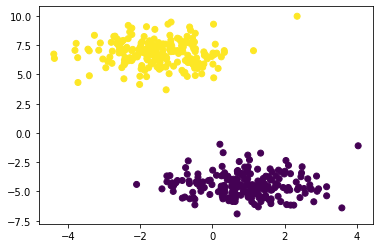

In [5]:
plt.scatter(X[:,0],X[:,1],c=y);

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                  test_size=0.2,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

### **Keras**

Keras is a high-level deep learning API written in Python and capable of running on top of TensorFlow

### **Activation Function**
An activation function in a neural network is a mathematical operation applied to the output of each neuron. Its purpose is to introduce non-linearity into the output of the neuron, allowing the neural network to learn a wider range of complex mappings from input to output.

Common activation functions include:

1. Sigmoid
2. ReLU (Rectified Linear Unit)
3. Tanh (Hyperbolic tangent)
4. Softmax

The choice of activation function depends on the specific use case and can have a significant impact on the network's ability to learn and make accurate predictions.

In [7]:
model_1=tf.keras.Sequential()
# tf.keras.Sequential is a class in TensorFlow's Keras API for defining a linear stack of layers in a neural network. 
# The Sequential class is used to build a sequential model where you can use simple, stack-like API to define and train deep learning models. 
# The layers in the model are stacked sequentially, where the output of one layer is used as the input to the next layer. 
# The Sequential model is the easiest way to build a model in Keras, and is suitable for most use cases.
# ----------------------------------------------------------------------------------------------------------------------------------------------
model_1.add(tf.keras.layers.Dense(8,activation='relu')) # 8 is number of units
# tf.keras.layers.Dense is a layer in TensorFlow's Keras API that implements a dense, fully connected layer for neural networks. 
# It applies a linear operation to the input data and produces a single output per neuron. 
# The layer has configurable number of neurons and activation functions. 
# It's typically used for solving regression and classification problems.
# ----------------------------------------------------------------------------------------------------------------------------------------------
model_1.add(tf.keras.layers.Dense(1,activation='sigmoid')) # 1 is number of units

In [8]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# tf.keras.optimizers module in TensorFlow provides a collection of optimizer classes for optimizing a model's trainable variables during 
# the training process. It implements various optimization algorithms such as SGD, RMSprop, Adam, etc., that adjust the model's weights 
# based on the gradients computed from the loss function. The optimizer is a crucial component of the training process, 
# and its choice can have a significant impact on the model's performance
# ----------------------------------------------------------------------------------------------------------------------------------------------
# tf.keras.losses.BinaryCrossentropy is a loss function in TensorFlow used for binary classification problems. 
# It measures the dissimilarity between the predicted probability distribution and the true distribution. 
# The true distribution is represented as binary (0 or 1) labels, and the predicted distribution is represented as a probability.
# The BinaryCrossentropy function calculates the mean of the cross-entropy loss between the true labels and 
# the predicted probabilities for each sample in the batch. The binary cross-entropy loss is defined as:

# -y * log(p) - (1 - y) * log(1 - p)

# where y is the true label and p is the predicted probability. 
# This loss is used to penalize the model when its predicted probabilities are far from the true labels.
# ----------------------------------------------------------------------------------------------------------------------------------------------
# Metric is used for measurnent of performance of model, RMSE can also be used


### Training the model

Epoch 1/50
10/10 [==============================] - 2s 3ms/step - loss: 1.6668 - accuracy: 0.4906
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 1.5512 - accuracy: 0.4906
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 1.4447 - accuracy: 0.4906
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 1.3460 - accuracy: 0.4906
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 1.2544 - accuracy: 0.4906
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 1.1725 - accuracy: 0.4938
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.4938
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 1.0236 - accuracy: 0.4938
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.9591 - accuracy: 0.4938
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.9014 - accuracy: 0.4938
Epoch 11/50
10/10 [

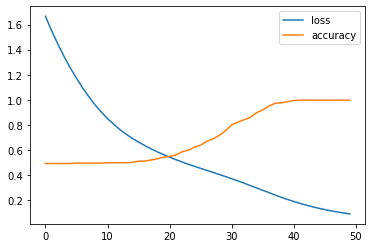

In [9]:
tf.random.set_seed(100)
history=model_1.fit(X_train,y_train,epochs=50)
hist=pd.DataFrame(history.history)
hist.plot();

#epochs=50 is a hyperparameter that determines the number of iterations to train a machine learning model. 
# In each iteration, the model is trained on the entire training dataset, and the training process continues 
# until the specified number of epochs is reached.
# For example, if you set epochs=50, then the training process will continue for 50 iterations, updating the model's weights after each iteration 
# to minimize the loss. The number of epochs is a trade-off between model accuracy and computational cost. 
# Too few epochs may result in underfitting, where the model is not able to capture the patterns in the data, 
# and too many epochs may lead to overfitting, where the model starts memorizing the training data and performs poorly on new, unseen data.

### Model Summary

In [10]:
model_1.summary()
# Model: "sequential" -> that we defined 
# Output Shape  -> 32 is number of batch, 8 units in hidden layer, 1 units in final layer
# Param -> Param is number of connections between each layer
#    24: 8 + 8 (Units) + 8 (error) => Forward Propogation
#    9: hidden layer has 8 units and 1 unit of (error) => Backward Propogation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 8)                   24        
                                                                 
 dense_1 (Dense)             (32, 1)                   9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


### Model Plot

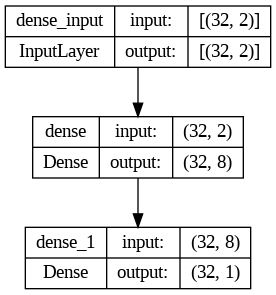

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model_1,show_shapes=True)

# Input is 32 data points, number feature is 2
# Output of first layer will be input of second layer
# Output of 2nd layer: 32 is number of data point in one batch, 8 is number of units that we define while creating the layer
# Output of second layer will be input of third layer
# Output of 3rd layer: 32 is number of data point in one batch, 1 is output i.e. 'y'

In [12]:
model_1.predict(X_test)

3/3 [==============================] - 0s 4ms/step


array([[8.92641664e-01],
       [8.00650101e-03],
       [9.33833539e-01],
       [1.42859016e-02],
       [8.97426486e-01],
       [8.85671843e-03],
       [1.38168149e-02],
       [4.79490357e-03],
       [9.25500412e-04],
       [7.55576193e-01],
       [8.49275231e-01],
       [7.93574750e-01],
       [8.76890242e-01],
       [7.62475550e-01],
       [1.88089011e-03],
       [8.68167222e-01],
       [5.93677023e-03],
       [8.84447753e-01],
       [1.87583384e-03],
       [9.36203122e-01],
       [8.66342604e-01],
       [1.00802130e-03],
       [7.80123472e-01],
       [2.38803755e-02],
       [8.96961570e-01],
       [8.72729957e-01],
       [4.86986618e-03],
       [1.20788142e-02],
       [1.09131625e-02],
       [2.77343462e-03],
       [8.20537090e-01],
       [8.99744391e-01],
       [2.79184803e-03],
       [5.89270471e-03],
       [8.63453269e-01],
       [1.90851593e-03],
       [8.65967572e-01],
       [8.99046101e-03],
       [9.28464592e-01],
       [1.27931486e-03],


# **Session 3** - Regression using Feed Forward Neural Network

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

In [14]:
house=fetch_california_housing()

In [15]:
house['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
house['data'].shape

(20640, 8)

In [17]:
# Feature set

X=pd.DataFrame(house['data'],columns=house['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
y=pd.DataFrame(house['target'],columns=house['target_names'])
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [19]:
# Standardisation

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [20]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,
                      y, test_size=0.2, random_state=100)


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

# Model Building

In [21]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(20,activation='relu'))
model_1.add(tf.keras.layers.Dense(1))

In [22]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mae'])

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 1.2571 - mae: 0.7929
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.5532 - mae: 0.5297
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4570 - mae: 0.4825
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4233 - mae: 0.4672
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4091 - mae: 0.4589
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4026 - mae: 0.4546
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3935 - mae: 0.4489
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3870 - mae: 0.4449
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3828 - mae: 0.4416
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3773 - mae: 0.4386
Epoch 11/100
516/516 [=================

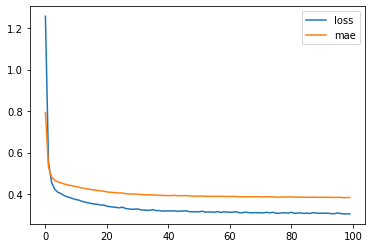

In [23]:
tf.random.set_seed(100)
history=model_1.fit(X_train,y_train,epochs=100)
hist=pd.DataFrame(history.history)
hist.plot();

# Number of batch is always 32 and batch size will change according to number of datapoints in training set

In [24]:
model_1.summary()

# 32 is number of batch, 20 is number of units in hidden layer and 1 is number of unit in final layer
# 180 = (8+1) * 20 => 20 is number of units in hidden layer and 8+1=9 is 8 features, 1 error unit between 1st and 2nd layer
# 21 = (1) + 20 => 20 is number of units in hidden layer 1 error unit between 2nd and 3rd layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (32, 20)                  180       
                                                                 
 dense_3 (Dense)             (32, 1)                   21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


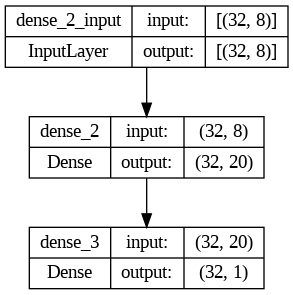

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

**Model Evaluation**

In [26]:
test_mse,test_mae=model_1.evaluate(X_test,y_test)

# 129 is batch size for test

129/129 [==============================] - 0s 1ms/step - loss: 0.2956 - mae: 0.3770


In [27]:
# mean_squared_error

print('Test MSE:',test_mse)
print('Train MSE:0.3076' )

Test MSE: 0.2955688238143921
Train MSE:0.3076


In [28]:
# mean_absolute_error

print('Test MAE:', test_mae)
print('Train MAE:0.3835 ')

Test MAE: 0.37700796127319336
Train MAE:0.3835 


**Model Prediction**

In [29]:
y_pred=model_1.predict(X_test)
print('The predicted house prices:\n',y_pred)

129/129 [==============================] - 0s 1ms/step
The predicted house prices:
 [[2.3633373]
 [1.3984051]
 [1.3773831]
 ...
 [1.5441365]
 [0.8237859]
 [1.1314454]]


In [30]:
y_test

,MedHouseVal
8151,2.45300
53,1.04200
3039,1.46200
9484,1.54200
9307,3.24200
...,...
16733,1.17200
5264,5.00001
12374,2.39300
19662,0.85700


**Refer**

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

# Session 4 - Multi-Class Classification 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [32]:
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Visulatsation

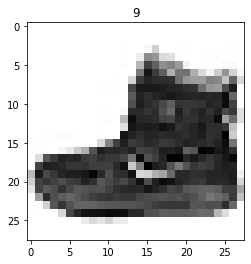

In [34]:
plt.imshow(X_train[0],'Greys')
plt.title(y_train[0]);

In [35]:
# Creating a dictionary of nos and respective fashion items
# This data was taken from fashion_mnist from tensor flow

fashion_dict={0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [36]:
fashion_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

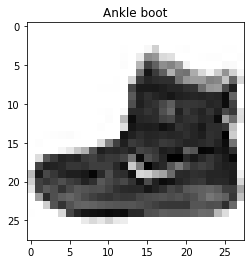

In [37]:
plt.imshow(X_train[0],'Greys')
plt.title(fashion_dict[y_train[0]]);

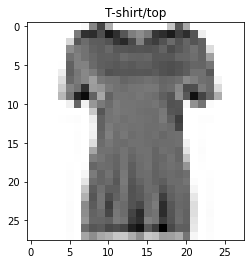

In [38]:
plt.imshow(X_train[10],'Greys')
plt.title(fashion_dict[y_train[10]]);

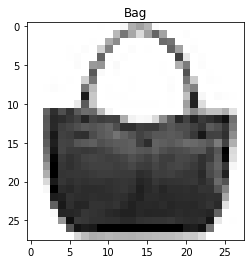

In [39]:
plt.imshow(X_train[100],'Greys')
plt.title(fashion_dict[y_train[100]]);

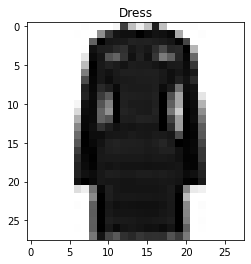

In [40]:
plt.imshow(X_train[500],'Greys')
plt.title(fashion_dict[y_train[500]]);

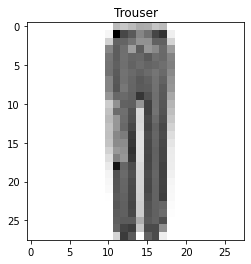

In [41]:
plt.imshow(X_train[1000],'Greys')
plt.title(fashion_dict[y_train[1000]]);

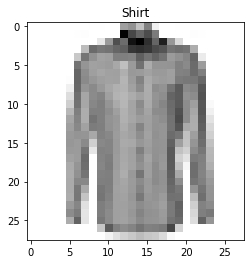

In [42]:
plt.imshow(X_train[3000],'Greys')
plt.title(fashion_dict[y_train[3000]]);

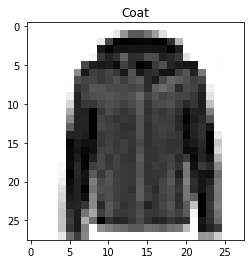

In [43]:
plt.imshow(X_train[5000],'Greys')
plt.title(fashion_dict[y_train[5000]]);

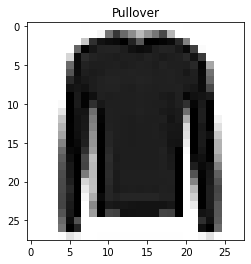

In [44]:
plt.imshow(X_train[15000],'Greys')
plt.title(fashion_dict[y_train[15000]]);

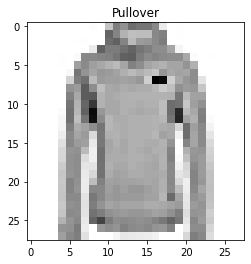

In [45]:
plt.imshow(X_train[45000],'Greys')
plt.title(fashion_dict[y_train[45000]]);

### Model Building

In [46]:
fashion_1=tf.keras.Sequential()
fashion_1.add(tf.keras.layers.Flatten())
fashion_1.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_1.add(tf.keras.layers.Dense(10,activation='softmax'))

# tf.keras.layers.Flatten is a layer in TensorFlow's tf.keras API that flattens a multi-dimensional tensor into a 1D tensor. 
# The layer takes the input tensor and flattens it into a single dimension such that the shape of the input tensor changes 
# from (batch_size, ...) to (batch_size, product of all dimensions). 
# This operation is often used before passing the output of a multi-dimensional tensor to a dense layer in a neural network.

# The softmax function is commonly used as the activation function for the output layer in deep learning models for multi-class 
# classification problems, where the goal is to predict a categorical label from multiple possible classes.

In [47]:
fashion_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# SparseCategoricalCrossentropy is a loss function used in deep learning for multi-class classification problems where the target labels 
# are integers and not one-hot encoded. It calculates the difference between the predicted probabilities for each class and the true label 
# and measures the quality of the prediction. It is called "sparse" because it assumes the target labels are integers and that 
# only one target label per sample is allowed. This is in contrast to "categorical crossentropy" where the target labels are 
# one-hot encoded and multiple target labels per sample are allowed.

Epoch 1/25
1875/1875 [==============================] - 11s 5ms/step - loss: 3.5600 - accuracy: 0.7253
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7982
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5291 - accuracy: 0.8138
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5129 - accuracy: 0.8201
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5059 - accuracy: 0.8246
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4899 - accuracy: 0.8287
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4772 - accuracy: 0.8343
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4799 - accuracy: 0.8339
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4583 - accuracy: 0.8400
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.46

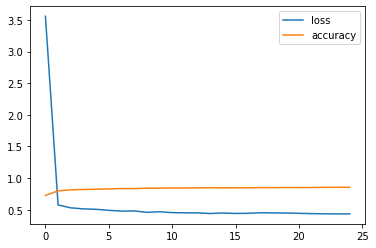

In [48]:
tf.random.set_seed(100)
history_1=fashion_1.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_1.history).plot();

### Model Evaluation

In [49]:
test_loss,test_accuracy=fashion_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.8325


In [50]:
print('The Test Loss:',test_loss)
print('The Test Accuracy:',test_accuracy)

The Test Loss: 0.5439886450767517
The Test Accuracy: 0.8324999809265137


### Improving the model by adding one more hidden layer

In [51]:
fashion_2=tf.keras.Sequential()
fashion_2.add(tf.keras.layers.Flatten())
fashion_2.add(tf.keras.layers.Dense(300,activation='relu'))

fashion_2.add(tf.keras.layers.Dense(100,activation='relu')) ## Adding a hidden layer of 100 units

fashion_2.add(tf.keras.layers.Dense(10,activation='softmax'))
# ----------------------------------------------------------------------------------------------------------------------------------------------
# The softmax function is commonly used as the activation function for the output layer in deep learning models for 
# multi-class classification problems, where the goal is to predict a categorical label from multiple possible classes.

Epoch 1/25
1875/1875 [==============================] - 17s 8ms/step - loss: 2.5921 - accuracy: 0.7727
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5140 - accuracy: 0.8245
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4615 - accuracy: 0.8380
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4391 - accuracy: 0.8453
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4112 - accuracy: 0.8541
Epoch 6/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3919 - accuracy: 0.8602
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3769 - accuracy: 0.8649
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3694 - accuracy: 0.8686
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3566 - accuracy: 0.8722
Epoch 10/25
1875/1875 [==============================] - 10s 5ms/step - loss

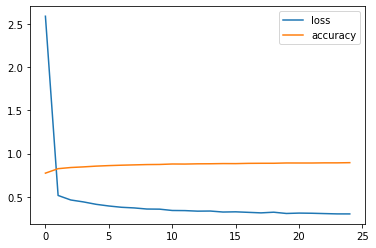

In [52]:
fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_2=fashion_2.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_2.history).plot();

In [53]:
# Model_2 Evaluation

test_loss,test_accuracy=fashion_2.evaluate(X_test,y_test)

print('Test Loss:',test_loss)

print('Test accuracy:',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8694
Test Loss: 0.42194852232933044
Test accuracy: 0.8694000244140625


### Improving the model accuracy by adding one more hidden layer

In [54]:
fashion_3=tf.keras.Sequential()
fashion_3.add(tf.keras.layers.Flatten())
fashion_3.add(tf.keras.layers.Dense(300,activation='relu')) ## First Layer
fashion_3.add(tf.keras.layers.Dense(100,activation='relu')) ## 2nd Layer

# Adding a layer of 25 units
fashion_3.add(tf.keras.layers.Dense(25,activation='relu')) ## Adding a hidden layer of 25 units - 3rd Layer

fashion_3.add(tf.keras.layers.Dense(10,activation='softmax'))

Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 2.1054 - accuracy: 0.2717
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6970 - accuracy: 0.3118
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5804 - accuracy: 0.3420
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5739 - accuracy: 0.3466
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5046 - accuracy: 0.3644
Epoch 6/25
1875/1875 [==============================] - 16s 9ms/step - loss: 1.4901 - accuracy: 0.3709
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4670 - accuracy: 0.3741
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4430 - accuracy: 0.3776
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4305 - accuracy: 0.3793
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1

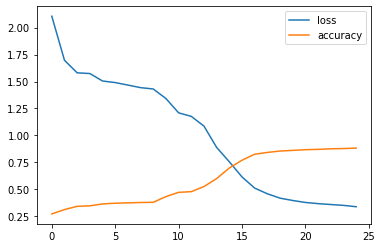

In [55]:
fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_3=fashion_3.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_3.history).plot();

In [56]:
test_loss,test_accuracy=fashion_3.evaluate(X_test,y_test)

print('Test Loss:',test_loss)

print('Test accuracy:',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.8560
Test Loss: 0.5275768637657166
Test accuracy: 0.8560000061988831


**Model 2**

Test Loss: 0.4505595266819

Test accuracy: 0.8618000149726868

**Model 3**

Test Loss: 2.3026039600372314

Test accuracy: 0.10000000149011612

---------------------------------

As we can see that hte accuracy for model 3 has reduced and loss has increased. Hence, we will go ahead with model 2


### Improving the model by changing the number of units



In [57]:
fashion_4=tf.keras.Sequential()
fashion_4.add(tf.keras.layers.Flatten())

fashion_4.add(tf.keras.layers.Dense(200,activation='relu')) # Changing the no of units from 300 to 200

fashion_4.add(tf.keras.layers.Dense(100,activation='relu'))

fashion_4.add(tf.keras.layers.Dense(10,activation='softmax'))

Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4080 - accuracy: 0.7608
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5830 - accuracy: 0.8128
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5228 - accuracy: 0.8238
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4678 - accuracy: 0.8388
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4392 - accuracy: 0.8471
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4250 - accuracy: 0.8496
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4008 - accuracy: 0.8571
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3917 - accuracy: 0.8604
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3802 - accuracy: 0.8636
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.37

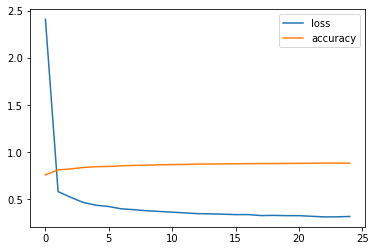

In [58]:
fashion_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(100)
history_4=fashion_4.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_4.history).plot();

In [59]:
test_loss,test_accuracy=fashion_4.evaluate(X_test,y_test)

print('Test Loss:',test_loss)
print('Test Accuracy:',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8654
Test Loss: 0.43168535828590393
Test Accuracy: 0.8654000163078308


**Model 2**

Test Loss: 0.4505595266819

Test accuracy: 0.8618000149726868

**Model 4**

Test Loss: 0.4424266219139099

Test Accuracy: 0.8579000234603882

---------------------------------

As we can see that the accuracy for model 4 has reduced. Hence, we will go ahead with model 2


In [60]:
# Model Summary

fashion_2.summary()

# 235500 -> (784+1) * 300
# 30100 -> (300+1) * 100
# 1010 -> (100+1) * 10

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


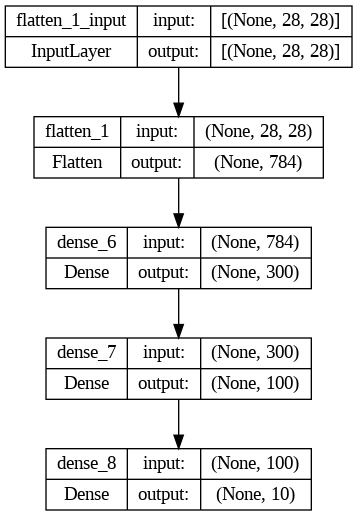

In [61]:
# Model Plot

from tensorflow.keras.utils import plot_model
plot_model(fashion_2,show_shapes=True)

### Prediction

In [62]:
y_pred=fashion_2.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [63]:
np.argmax(y_pred[0])

# argmax() function returns indices of the max element of the array in a particular axis.

9

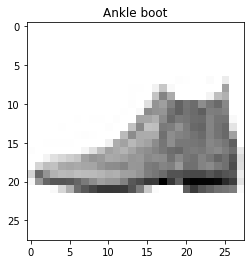

In [64]:
plt.imshow(X_test[0],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[0])]);

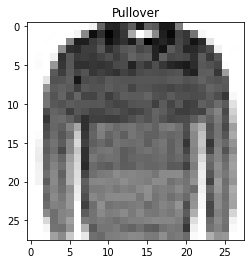

In [65]:
plt.imshow(X_test[20],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[20])]);

# **Session 5 -** Hyper parameter tuning and Regularisation

## Hyper parameters

* No of layers

* No of units

* Activation function

* Loss function

* Optimizer

* Dropout rate

* Learning rate

* Epoch

* Etc..

### No of layers:

* Output layer: One

* Input Layer: One

* Hidden Layers: At least one, depends upon the problem and complexity.

### No of units:

* Output layer:

    * Regression: One

    * Binary classiifcation: One/ Two depends upon activation function

    * Multi-class classification: No of classes.

* Input layer: Depends upon the no of features/values in the data point 

* Hidden layer: Depends, generally between 10 and 100.

### Activation function

* Output layer

    * Regression: Linear

    * Binary classification: 
    
      * sigmoid (if the class labels are 0 and 1)

      * tanh (if the class labels are -1 and 1)

    * Multi-class classiifcation: softmax.

* Hidden layer: 'relu', in general.

### Loss function

* Regression: MAE, MSE(more preferred)

* Binary classification: BinaryCrossentropy

* Multi-class Classification: Categorical Crossentropy / Sparse Categorical Crossentropy

### Optimizer

* Adam, in general

all loss function

https://www.tensorflow.org/api_docs/python/tf/keras/losses



For Hyper parameter tuning you  refer this 
https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/


# Regularisation

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [68]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Visualisation

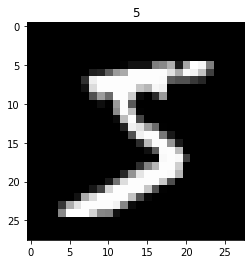

In [69]:
plt.imshow(X_train[0],'gray')
plt.title(y_train[0]);

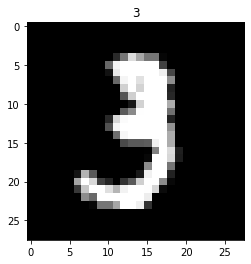

In [70]:
plt.imshow(X_train[10],'gray')
plt.title(y_train[10]);

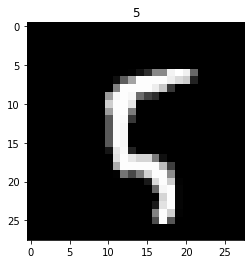

In [71]:
plt.imshow(X_train[100],'gray')
plt.title(y_train[100]);

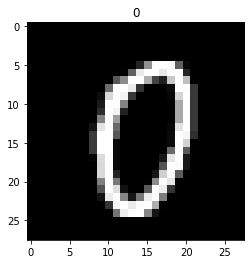

In [72]:
plt.imshow(X_train[1000],'gray')
plt.title(y_train[1000]);

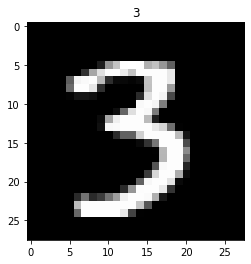

In [73]:
plt.imshow(X_train[10000],'gray')
plt.title(y_train[10000]);

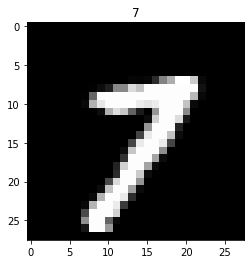

In [74]:
plt.imshow(X_train[40000],'gray')
plt.title(y_train[40000]);

In [75]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

### Basic Model

In [76]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(300, activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [77]:
# compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.6190 - accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3466 - accuracy: 0.9273
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2760 - accuracy: 0.9366
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2561 - accuracy: 0.9417
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2345 - accuracy: 0.9477
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2188 - accuracy: 0.9500
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1966 - accuracy: 0.9549
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2010 - accuracy: 0.9555
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1819 - accuracy: 0.9585
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.190

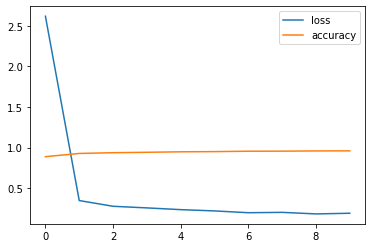

In [78]:
# Training the model

tf.random.set_seed(100)
hist_1=model_1.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_1.history).plot();

In [79]:
# Evaluation of the model

model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.9496


[0.2892712354660034, 0.9495999813079834]

Conditions for over-fitting:

1. Train Accuracy > Test Accuracy
2. Train loss < Test loss

### Comment 1:

Basic Model: Training loss=0.1779; Test loss=0.2957( Model is decent, but overfitting).


# Model with Normalization

In [80]:
# Normalization

normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_test)

X_train=normalizer(X_train)
X_test=normalizer(X_test)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2126 - accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0856 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0430 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0251 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.016

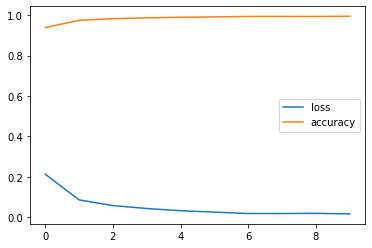

In [81]:
# New Model with Normalize data

model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(300, activation='relu'))
model_2.add(tf.keras.layers.Dense(10,activation='softmax'))

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training the model
tf.random.set_seed(100)

# X_train is the normalosed training set
hist_2=model_2.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

In [82]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.9760


[0.14527569711208344, 0.9760000109672546]

## Comment 2:

**Basic Model:** Training loss=0.1852; Test loss=0.3103( Model is decent, but overfitting).

**Model with Normlization:** Training loss=0.0170; Test loss=0.1470 ( Model improved, but overfitting still).

# Model with Cross Validation

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2256 - accuracy: 0.9358 - val_loss: 0.1352 - val_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0924 - accuracy: 0.9738 - val_loss: 0.1041 - val_accuracy: 0.9718
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.1041 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.1120 - val_accuracy: 0.9718
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.1257 - val_accuracy: 0.9701
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.1139 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.1380 - val_accuracy:

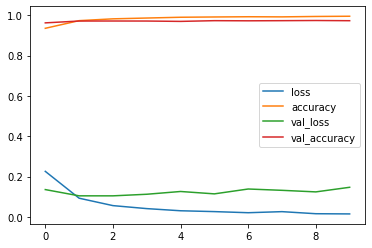

In [83]:
# Model with cross-Validation

model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(300, activation='relu'))
model_3.add(tf.keras.layers.Dense(10,activation='softmax'))

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Training the model
tf.random.set_seed(100)

# validation_split
hist_3=model_3.fit(X_train,y_train,epochs=10,validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

In [84]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9756


[0.16365613043308258, 0.975600004196167]

## Comment 3:

**Basic Model:** Training loss=0.1852; Test loss=0.3103( Model is decent, but overfitting).

**Model with Normlization:** Training loss=0.0170; Test loss=0. 1470 ( Model improved, but overfitting still).

**Model with Cross-validation:** Trainig loss: 0.0187; Test loss=0.1403 ( Model has improved, but epoch needs to curtailed to reduce overfitting).

# Model with Drop-Out


Drop out in used when our model is heavely dependent on one of the attributes only. Hence we randomly dorp some of the neurons

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2395 - accuracy: 0.9305 - val_loss: 0.1334 - val_accuracy: 0.9621
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1047 - accuracy: 0.9696 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0735 - accuracy: 0.9782 - val_loss: 0.0927 - val_accuracy: 0.9737
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0922 - val_accuracy: 0.9760
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.1026 - val_accuracy: 0.9758
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.1169 - val_accuracy: 0.9745
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.1067 - val_accuracy:

[0.14499005675315857, 0.9753000140190125]

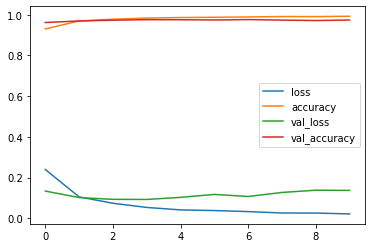

In [85]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(300,activation='relu'))

# Dropout layer
model_4.add(tf.keras.layers.Dropout(0.1)) # 10% of units will be dropped

model_4.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Training
tf.random.set_seed(100)
## Validation split
hist_4=model_4.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_4.history).plot();

print(' Evaluation Result:\n')
model_4.evaluate(X_test,y_test)

## Comment 4:

1. **Basic Model:** Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. **Model with Normalised data:** Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. **Model with Validation data:** Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. **Model with Dropout:** Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)


# Model with Early Stop

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2348 - accuracy: 0.9327 - val_loss: 0.1470 - val_accuracy: 0.9574
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0905 - accuracy: 0.9737 - val_loss: 0.1010 - val_accuracy: 0.9708
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0600 - accuracy: 0.9828 - val_loss: 0.1041 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0945 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.1287 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.1360 - val_accuracy: 0.9694
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9719


[0.14270615577697754, 0.9718999862670898]

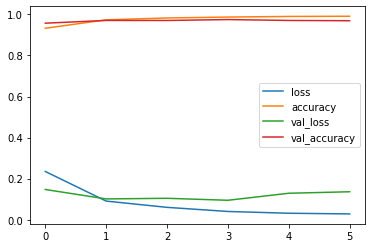

In [86]:
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(300,activation='relu'))
model_5.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_5=model_5.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_5.history).plot();

print(' Evaluation Result:\n')
model_5.evaluate(X_test,y_test)

## Remark 5:

1. **Basic Model:** Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. **Model with Normalised data:** Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. **Model with Validation data:** Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. **Model with Dropout:** Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. **Model with EarlyStop:** Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)


# Batch Normalization

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2529 - accuracy: 0.9254 - val_loss: 0.1400 - val_accuracy: 0.9621
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1158 - accuracy: 0.9652 - val_loss: 0.1367 - val_accuracy: 0.9676
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0826 - accuracy: 0.9753 - val_loss: 0.1666 - val_accuracy: 0.9729
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.1557 - val_accuracy: 0.9747
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9744


[0.13802321255207062, 0.974399983882904]

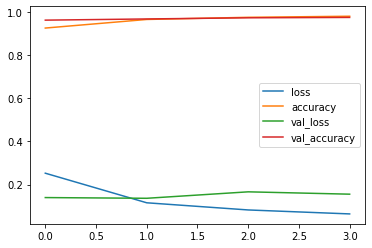

In [87]:
model_6=tf.keras.Sequential()
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(300,activation='relu'))

# Batch Normalisation
model_6.add(tf.keras.layers.BatchNormalization())
model_6.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_6=model_6.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_6.history).plot();

print(' Evaluation Result:\n')
model_6.evaluate(X_test,y_test)

## Remark 6:

1. **Basic Model:** Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. **Model with Normalised data:** Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. **Model with Validation data:** Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. **Model with Dropout:** Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. **Model with EarlyStop:** Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. **Model with Batch Normalization:** Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

# Model with two hidden layer

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2271 - accuracy: 0.9329 - val_loss: 0.1385 - val_accuracy: 0.9597
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0965 - accuracy: 0.9709 - val_loss: 0.1090 - val_accuracy: 0.9677
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.1298 - val_accuracy: 0.9649
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.1017 - val_accuracy: 0.9734
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.1268 - val_accuracy: 0.9694
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.1116 - val_accuracy: 0.9742
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9759


[0.11038575321435928, 0.9758999943733215]

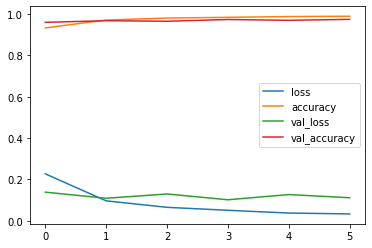

In [88]:
model_7=tf.keras.Sequential()
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(300,activation='relu'))

## Adding one more layer
model_7.add(tf.keras.layers.Dense(100,activation='relu'))

model_7.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_7=model_7.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_7.history).plot();

print(' Evaluation Result:\n')
model_7.evaluate(X_test,y_test)

## Comment 7:

1. **Basic Model:** Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. **Model with Normalised data:** Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. **Model with Validation data:** Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. **Model with Dropout:** Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. **Model with EarlyStop:** Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. **Model with Batch Normalization:** Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

7. **Model with 2 hidden layers:** Training loss=0.0356 ; Test loss= 0.1288(Model  NOT improved. Retain the model_5)

# Model with changed number of neuron in 1st hidden layer

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.9144 - val_loss: 0.1724 - val_accuracy: 0.9511
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9593 - val_loss: 0.1352 - val_accuracy: 0.9626
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.1221 - val_accuracy: 0.9645
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9769 - val_loss: 0.1256 - val_accuracy: 0.9669
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.1210 - val_accuracy: 0.9653
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.1258 - val_accuracy: 0.9684
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.1194 - val_accuracy:

[0.14021320641040802, 0.9653000235557556]

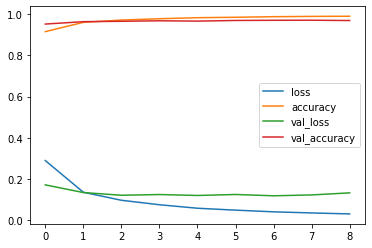

In [89]:
model_8=tf.keras.Sequential()
model_8.add(tf.keras.layers.Flatten())

# Change the no of units to 50
model_8.add(tf.keras.layers.Dense(50,activation='relu'))

model_8.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_8=model_8.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_8.history).plot();

print(' Evaluation Result:\n')
model_8.evaluate(X_test,y_test)

## Comment 8:

1. **Basic Model:** Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. **Model with Normalised data:** Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. **Model with Validation data:** Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. **Model with Dropout:** Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. **Model with EarlyStop:** Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. **Model with Batch Normalization:** Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

7. **Model with 2 hidden layers:** Training loss=0.0356 ; Test loss= 0.1288(Model  NOT improved. Retain the model_5)

8. **Model with 50 units:** Training loss= 0.0548; Test loss= 0.1277(Model   improved. Retain the model_8 as The best model)


# Compare DataFrame

In [120]:
compare_data = pd.DataFrame({'Model': ['Model_1', 'Model_2', 'Model_3', 'Model_4','Model_5','Model_6','Model_7','Model_8'],
        'Train_loss': [0.1852, 0.0170 , 0.0187, 0.0246, 0.0237, 0.0458, 0.0356,  0.0548],
        'Test_loss': [0.3103 , 0.1470, 0.1403,  0.1474, 0.1281, 0.1281, 0.1288, 0.1277]})
compare_data['Diff'] = compare_data['Test_loss']-compare_data['Train_loss']
compare_data

,Model,Train_loss,Test_loss,Diff
0,Model_1,0.1852,0.3103,0.1251
1,Model_2,0.0170,0.1470,0.1300
2,Model_3,0.0187,0.1403,0.1216
3,Model_4,0.0246,0.1474,0.1228
4,Model_5,0.0237,0.1281,0.1044
5,Model_6,0.0458,0.1281,0.0823
6,Model_7,0.0356,0.1288,0.0932
7,Model_8,0.0548,0.1277,0.0729


<Axes: xlabel='Model', ylabel='Train_loss'>

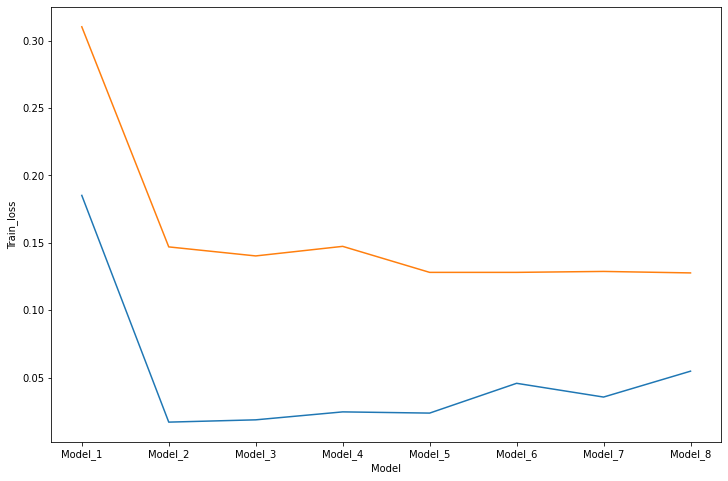

In [125]:
plt.figure(figsize=(12,8)) 
sns.lineplot(data=compare_data, x="Model", y="Train_loss")
sns.lineplot(data=compare_data, x="Model", y="Test_loss")

<Axes: xlabel='Model', ylabel='Diff'>

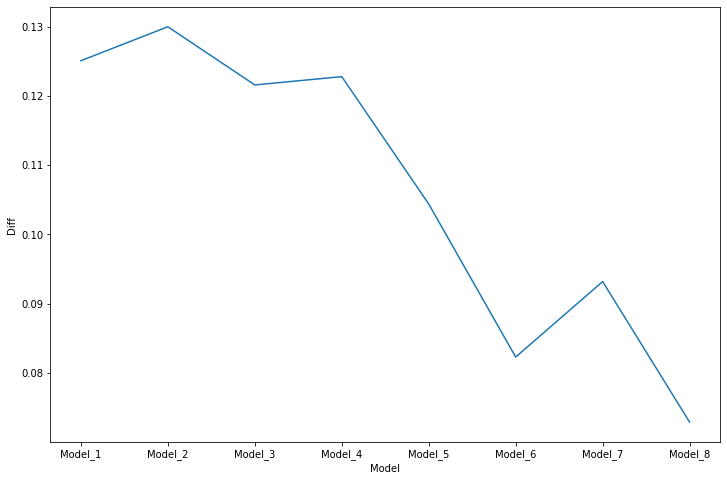

In [126]:
plt.figure(figsize=(12,8)) 
sns.lineplot(data=compare_data, x="Model", y="Diff")

In [90]:
model_8.save('best_mnist_model.h5')

In [91]:
my_mnist=tf.keras.models.load_model('best_mnist_model.h5')

In [92]:
my_mnist.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9653


[0.14021320641040802, 0.9653000235557556]

# Session 10 - LSTM (Long short-term memory)

RNN: Recurrent neural network for time series data. RNNs have the ability to process a sequence of inputs and maintain a memory of the past inputs, which allows them to make predictions or generate output based on the context of the sequence.

The architecture of an RNN typically consists of a single hidden layer with recurrent connections between the neurons in the layer. The output of each neuron is dependent not only on the input at the current time step but also on the output of the neuron in the previous time step. The training of an RNN is usually done using a variant of backpropagation

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [94]:
adani=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/ADANIPOWER.NS?period1=1646742145&period2=1678278145&interval=1d&events=history&includeAdjustedClose=true')

In [95]:
adani

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-08,118.400002,121.449997,117.349998,118.699997,118.699997,27745685
1,2022-03-09,121.300003,122.699997,119.599998,121.300003,121.300003,21234389
2,2022-03-10,125.000000,125.699997,121.349998,122.500000,122.500000,20823339
3,2022-03-11,122.000000,123.500000,121.099998,121.800003,121.800003,14362421
4,2022-03-14,122.550003,123.099998,120.500000,122.150002,122.150002,14143340
...,...,...,...,...,...,...,...
245,2023-03-01,153.000000,153.600006,152.149994,153.600006,153.600006,1372548
246,2023-03-02,161.250000,161.250000,161.250000,161.250000,161.250000,1030431
247,2023-03-03,169.300003,169.300003,169.300003,169.300003,169.300003,648028
248,2023-03-06,177.750000,177.750000,177.750000,177.750000,177.750000,2877047


In [96]:
# Use 'Close'

data=adani['Close']

In [97]:
# Train test split

train=data[:200]
test=data[200:]

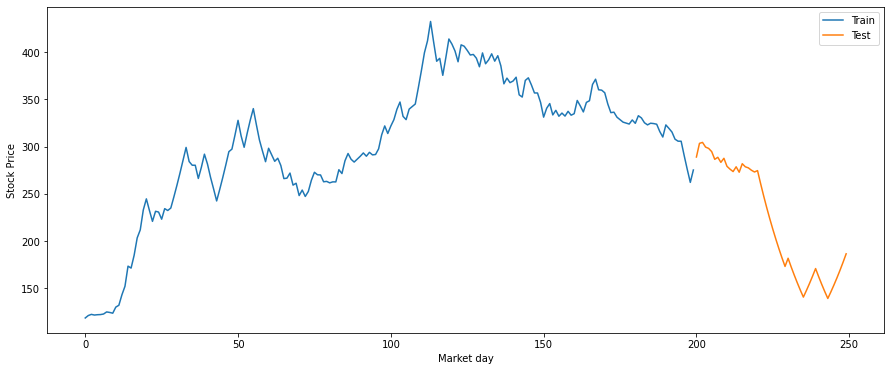

In [98]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.xlabel('Market day')
plt.ylabel('Stock Price')
plt.legend(['Train','Test']);

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_scaled=scaler.fit_transform(np.array(train).reshape(-1,1))

test_scaled=scaler.fit_transform(np.array(test).reshape(-1,1))


## Converting TS data to regression data

In [100]:
X_train=[]
y_train=[]
# window_size=10

for i in range(10,200):
  X_train.append(train_scaled[i-10:i,0])
  y_train.append(train_scaled[i])

In [101]:
X_train

[array([0.        , 0.00828555, 0.01210963, 0.00987892, 0.01099428,
        0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306]),
 array([0.00828555, 0.01210963, 0.00987892, 0.01099428, 0.01147229,
        0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755]),
 array([0.01210963, 0.00987892, 0.01099428, 0.01147229, 0.01338434,
        0.02039516, 0.01864247, 0.01609306, 0.03664755, 0.04286169]),
 array([0.00987892, 0.01099428, 0.01147229, 0.01338434, 0.02039516,
        0.01864247, 0.01609306, 0.03664755, 0.04286169, 0.07807521]),
 array([0.01099428, 0.01147229, 0.01338434, 0.02039516, 0.01864247,
        0.01609306, 0.03664755, 0.04286169, 0.07807521, 0.10691524]),
 array([0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306,
        0.03664755, 0.04286169, 0.07807521, 0.10691524, 0.17479288]),
 array([0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755,
        0.04286169, 0.07807521, 0.10691524, 0.17479288, 0.16826005]),
 array([0.02039516, 0.01864247, 0.

In [102]:
y_train

[array([0.03664755]),
 array([0.04286169]),
 array([0.07807521]),
 array([0.10691524]),
 array([0.17479288]),
 array([0.16826005]),
 array([0.21159977]),
 array([0.27007648]),
 array([0.2971638]),
 array([0.36456344]),
 array([0.40168898]),
 array([0.36281072]),
 array([0.32584448]),
 array([0.35978333]),
 array([0.35723392]),
 array([0.333174]),
 array([0.36870617]),
 array([0.36249203]),
 array([0.37077758]),
 array([0.40822181]),
 array([0.44741876]),
 array([0.48868703]),
 array([0.53202675]),
 array([0.57520718]),
 array([0.52756533]),
 array([0.51513705]),
 array([0.51513705]),
 array([0.47052265]),
 array([0.50812618]),
 array([0.55242189]),
 array([0.51912048]),
 array([0.47434668]),
 array([0.43530913]),
 array([0.39467815]),
 array([0.43323772]),
 array([0.47370939]),
 array([0.51625243]),
 array([0.56086684]),
 array([0.56947099]),
 array([0.61679414]),
 array([0.66650735]),
 array([0.61440408]),
 array([0.57568517]),
 array([0.62332693]),
 array([0.66730404]),
 array([0.706

In [103]:
# Converting to np.array

X_train=np.array(X_train)
y_train=np.array(y_train)

In [104]:
X_train.shape

(190, 10)

In [105]:
y_train.shape

(190, 1)

In [106]:
# Converting text data

X_test=[]
y_test=[]
# window_size=10

for i in range(10,50):
  X_test.append(test_scaled[i-10:i,0])
  y_test.append(test_scaled[i])

In [107]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [108]:
X_test.shape

(40, 10)

In [109]:
y_test.shape

(40, 1)

## Model Building

In [110]:
lstm=tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(50,return_sequences=True,
                              input_shape=(X_train.shape[1],1))) # (10,1)
lstm.add(tf.keras.layers.Dense(1))

In [111]:
# Compiling

lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])

The LSTM layer has 50 units, which means it will output a vector of length 50 for each input sequence. The parameter return_sequences=True indicates that the output of the layer will be a sequence rather than a single value. The input shape of the layer is (X_train.shape[1], 1), where X_train is the training data and X_train.shape[1] is the length of each input sequence. The 1 in the input shape indicates that each element of the input sequence is a scalar.

Epoch 1/100
6/6 [==============================] - 2s 9ms/step - loss: 0.3533 - mae: 0.5649
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2038 - mae: 0.4186
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1150 - mae: 0.2787
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0823 - mae: 0.2232
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0808 - mae: 0.2318
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0707 - mae: 0.2112
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0621 - mae: 0.1868
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0582 - mae: 0.1740
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0545 - mae: 0.1662
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0504 - mae: 0.1594
Epoch 11/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0468 

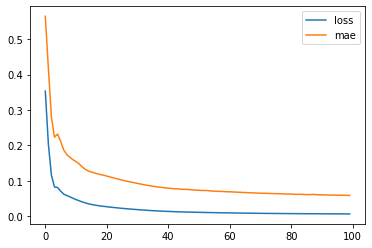

In [112]:
# Training

tf.random.set_seed(10)
hist=lstm.fit(X_train,y_train,epochs=100)
pd.DataFrame(hist.history).plot();

## Model Evaluation

In [113]:
lstm.evaluate(X_test,y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.0500 - mae: 0.1714


[0.05001647397875786, 0.17142707109451294]

In [114]:
lstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dense_33 (Dense)            (None, 10, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
